In [2]:
pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.8 MB 2.1 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/14.8 MB 1.7 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/14.8 MB 1.6 MB/s eta 0:00:09
   ---- ----------------------------------- 1.6/14.8 MB 1.6 MB/s eta 0:00:09
   ------ --------------------------------- 2.4/14.8 MB 1.9 MB/s eta 0:00:07
   ------- -------------------------------- 2.9/14.8 MB 2.1 MB/s eta 0:00:06
   --------- ------------------------------ 3.4/14.8 MB 2.2 MB/s eta 0:00:06
   ------------ --------------------------- 4.7/14.8 MB 2.6 MB/s eta 0:00:04
   --------------- ------------------------ 5.8/14.8 MB 2.8 MB/s eta 0:00:04
   ------------------- -------------------- 7.1/14.8 MB 3.1 MB/s eta 0:00:03
   --------------------- ------------------ 8.1/14.8 MB 3.3 MB/s eta 0:00:03
   ----------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker

In [4]:
df = pd.read_csv("Global_YouTube_Statistics.csv", encoding="ISO-8859-1")
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [6]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [7]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
df.shape

(995, 28)

In [9]:
df.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]

subscribers_for_last_30_days               337
Longitude                                  123
Latitude                                   123
Urban_population                           123
Unemployment rate                          123
Population                                 123
Gross tertiary education enrollment (%)    123
Country                                    122
Abbreviation                               122
country_rank                               116
video_views_for_the_last_30_days            56
category                                    46
channel_type_rank                           33
channel_type                                30
created_date                                 5
created_month                                5
created_year                                 5
video_views_rank                             1
dtype: int64

In [10]:
sorted(df['category'].dropna().unique())

['Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Trailers',
 'Travel & Events']

In [11]:
print(f"Number of unique categories: {df['category'].nunique(dropna=True)}")

Number of unique categories: 18


In [12]:
df.duplicated().sum()

0

In [13]:
df = df.dropna()

In [14]:
df[df['category'].isnull()].head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [15]:
dropped_features = [
    'Abbreviation', 'created_month', 'created_date', 'Latitude', 'Longitude'
]
df = df.drop(dropped_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   channel_type                             554 non-null    object 
 9   video_views_rank                         554 non-null    float64
 10  country_rank                             554 non-null  

In [18]:
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']

correlation_matrix = df[numerical_cols].corr()

correlation_matrix

,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,video_views_for_the_last_30_days,subscribers_for_last_30_days
subscribers,1.000000,0.850776,0.074791,0.534713,0.534388,0.534883,0.534721,0.321182,0.361800
video views,0.850776,1.000000,0.147477,0.637991,0.637376,0.638861,0.638019,0.360970,0.203693
uploads,0.074791,0.147477,1.000000,0.155557,0.156062,0.156639,0.155540,0.079308,0.009067
lowest_monthly_earnings,0.534713,0.637991,0.155557,1.000000,0.999937,0.999914,0.999998,0.585838,0.616795
highest_monthly_earnings,0.534388,0.637376,0.156062,0.999937,1.000000,0.999832,0.999935,0.585788,0.617150
lowest_yearly_earnings,0.534883,0.638861,0.156639,0.999914,0.999832,1.000000,0.999912,0.585758,0.615874
highest_yearly_earnings,0.534721,0.638019,0.155540,0.999998,0.999935,0.999912,1.000000,0.585837,0.616816
video_views_for_the_last_30_days,0.321182,0.360970,0.079308,0.585838,0.585788,0.585758,0.585837,1.000000,0.366320
subscribers_for_last_30_days,0.361800,0.203693,0.009067,0.616795,0.617150,0.615874,0.616816,0.366320,1.000000


In [19]:
yearly_trend = df['created_year'].value_counts().sort_index()

## Visualize the YouTube channel creation trend over the year

plt.figure(figsize=(10, 6), facecolor='#f5f5f5')  
plt.plot(yearly_trend.index, yearly_trend.values, 
         marker='o', 
         linestyle='-', 
         color='#1f77b4',  
         markerfacecolor='#ff7f0e', 
         markeredgecolor='#ffffff',  
         markeredgewidth=1.5, 
         linewidth=2)
plt.title('YouTube Channel Creation Trend Over the Years', 
          fontsize=14, 
          color='#333333',  
          fontweight='bold')
plt.xlabel('Year', fontsize=12, color='#333333')  
plt.ylabel('Number of Channels', fontsize=12, color='#333333')  
plt.grid(True, color='#d3d3d3', linestyle='--', alpha=0.7) 
ax = plt.gca()
ax.set_facecolor('#e8ecef')  
ax.tick_params(colors='#333333')  
plt.show()

In [20]:
sns.set(style="whitegrid")

In [21]:
top_subscribers = df.nlargest(10, "subscribers")[["Youtuber", "subscribers"]]
top_earnings = df.nlargest(10, "highest_yearly_earnings")[["Youtuber", "highest_yearly_earnings"]]
top_countries = df["Country"].value_counts().dropna().nlargest(10)

## Top 10 by Subscribers

<Figure size 1000x600 with 0 Axes>

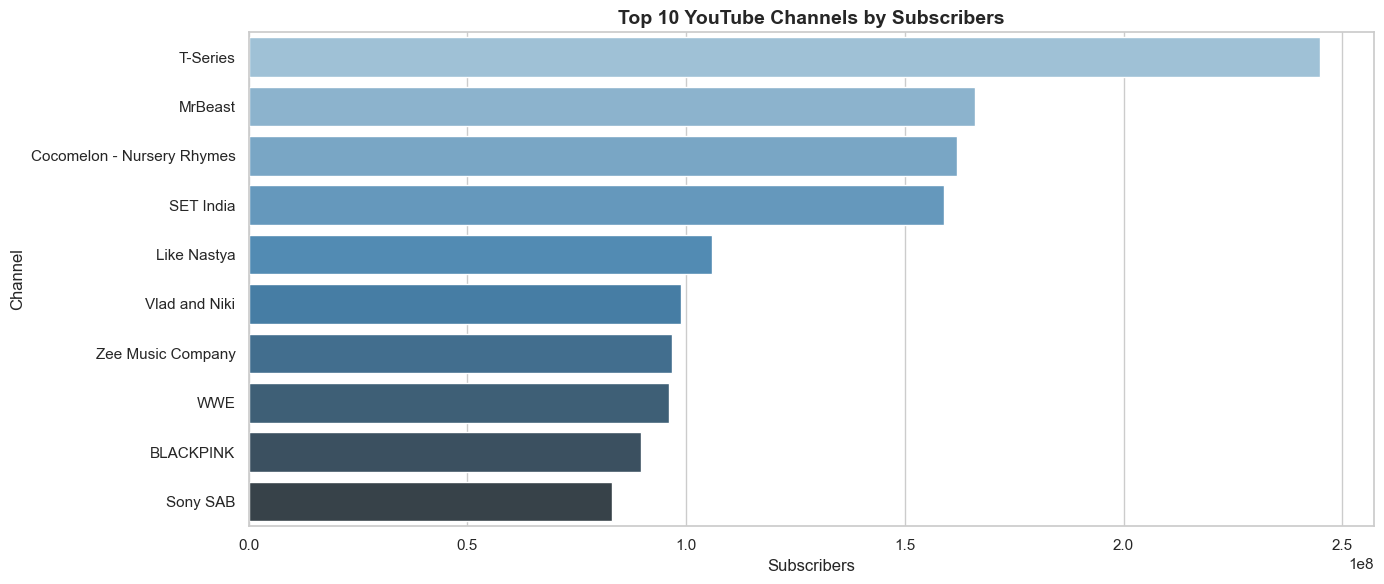

In [22]:
plt.figure(figsize=(14, 6))  
sns.barplot(x="subscribers", y="Youtuber", data=top_subscribers, palette="Blues_d")
plt.title("Top 10 YouTube Channels by Subscribers", fontsize=14, fontweight='bold')
plt.xlabel("Subscribers", fontsize=12)
plt.ylabel("Channel", fontsize=12)
plt.tight_layout()
plt.show()

## Top 10 YouTube Channels by Highest Estimated Yearly Earnings

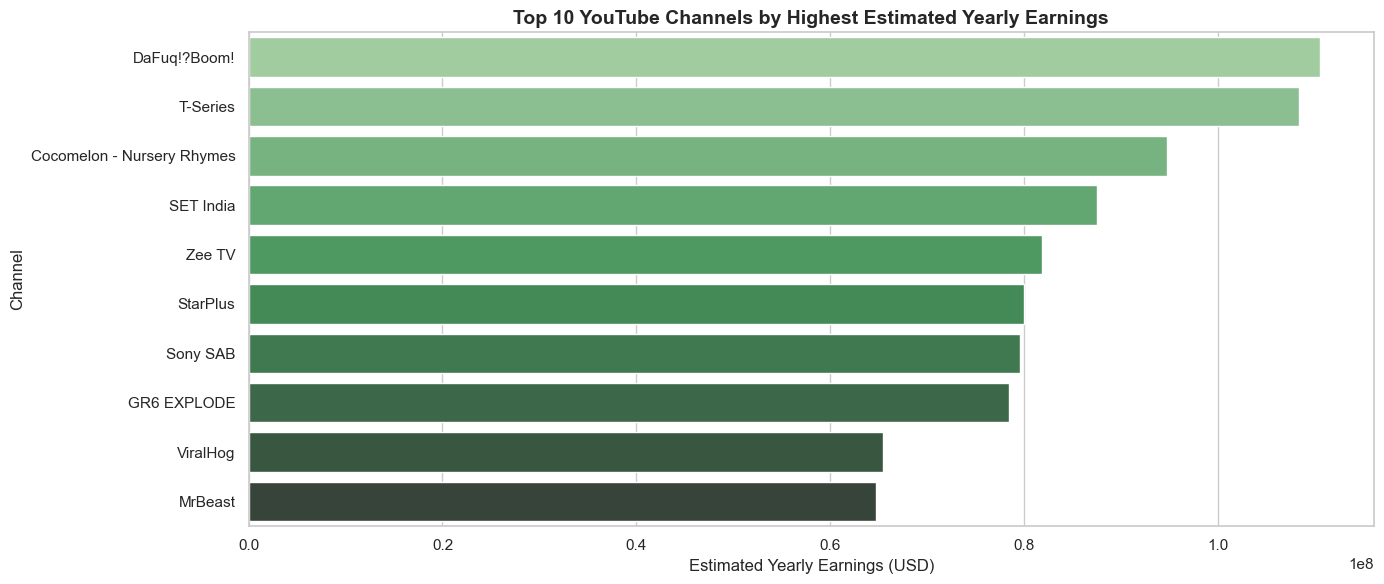

In [23]:
plt.figure(figsize=(14, 6))  
sns.barplot(x="highest_yearly_earnings", y="Youtuber", data=top_earnings, palette="Greens_d")
plt.title("Top 10 YouTube Channels by Highest Estimated Yearly Earnings", fontsize=14, fontweight='bold')
plt.xlabel("Estimated Yearly Earnings (USD)", fontsize=12)
plt.ylabel("Channel", fontsize=12)
plt.tight_layout()
plt.show()

## Top 10 Countries by Number of Top YouTube Channels

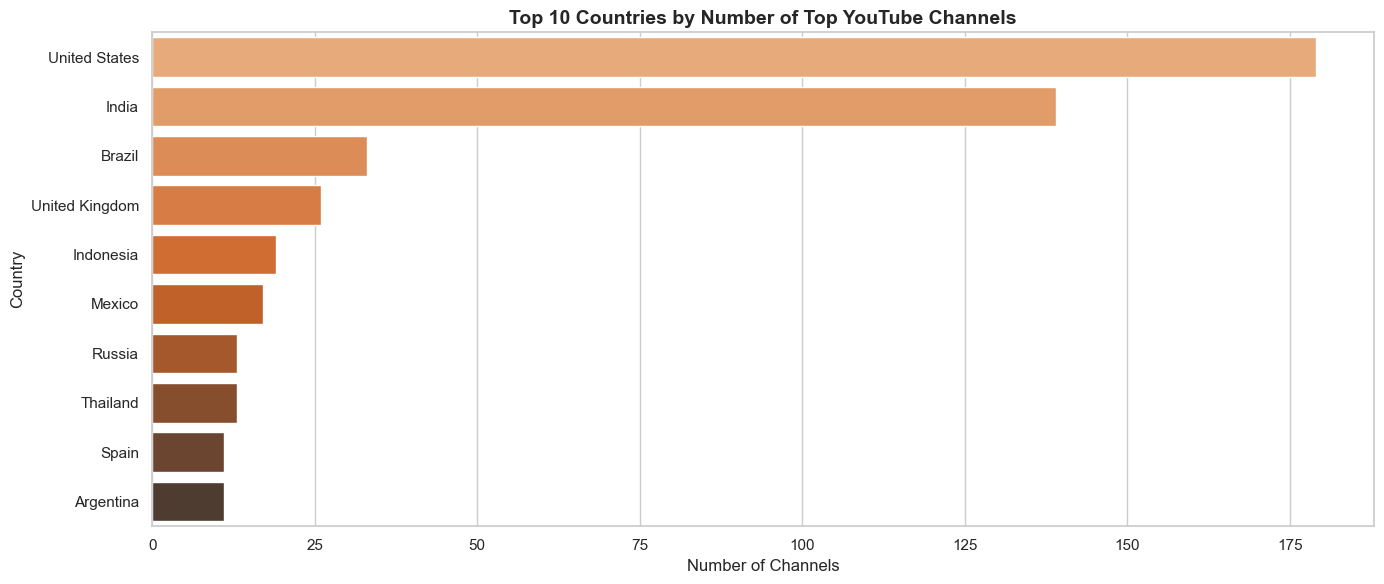

In [24]:
plt.figure(figsize=(14, 6))  
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Oranges_d")
plt.title("Top 10 Countries by Number of Top YouTube Channels", fontsize=14, fontweight='bold')
plt.xlabel("Number of Channels", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

## Calculate the number of channels in each category

In [25]:
category_counts = df['category'].value_counts()
category_counts = category_counts.sort_values(ascending=False)

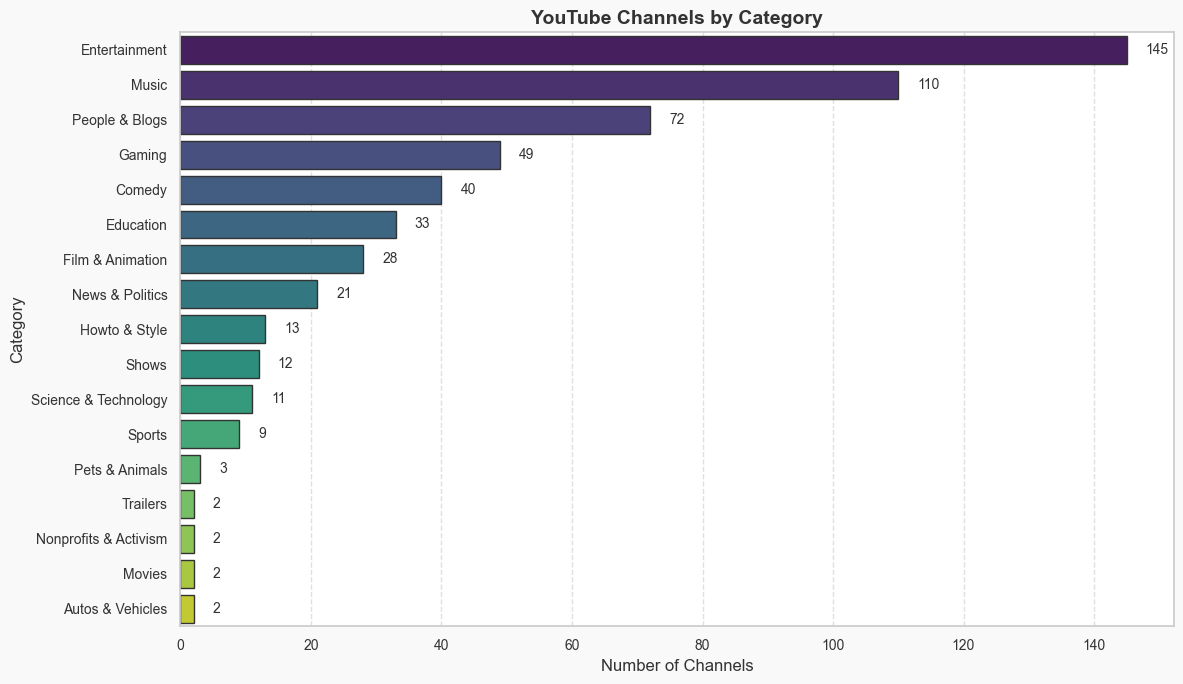

In [26]:
plt.figure(figsize=(12, 7), facecolor='#f9f9f9')
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis', edgecolor='#333333')
plt.title('YouTube Channels by Category', fontsize=14, color='#333333', fontweight='bold')
plt.xlabel('Number of Channels', fontsize=12, color='#333333')
plt.ylabel('Category', fontsize=12, color='#333333')
plt.grid(axis='x', linestyle='--', color='#d3d3d3', alpha=0.7)
ax = plt.gca()
ax.set_facecolor('#ffffff')
ax.tick_params(colors='#333333', labelsize=10)
for i, v in enumerate(category_counts.values):
    ax.text(v + 0.02 * max(category_counts.values), i, f'{int(v)}', 
            va='center', fontsize=10, color='#333333')
plt.tight_layout()
plt.show()

## Calculate the total number of channels from each country

In [27]:
country_counts = df['Country'].value_counts()
country_counts = country_counts.sort_values(ascending=False)

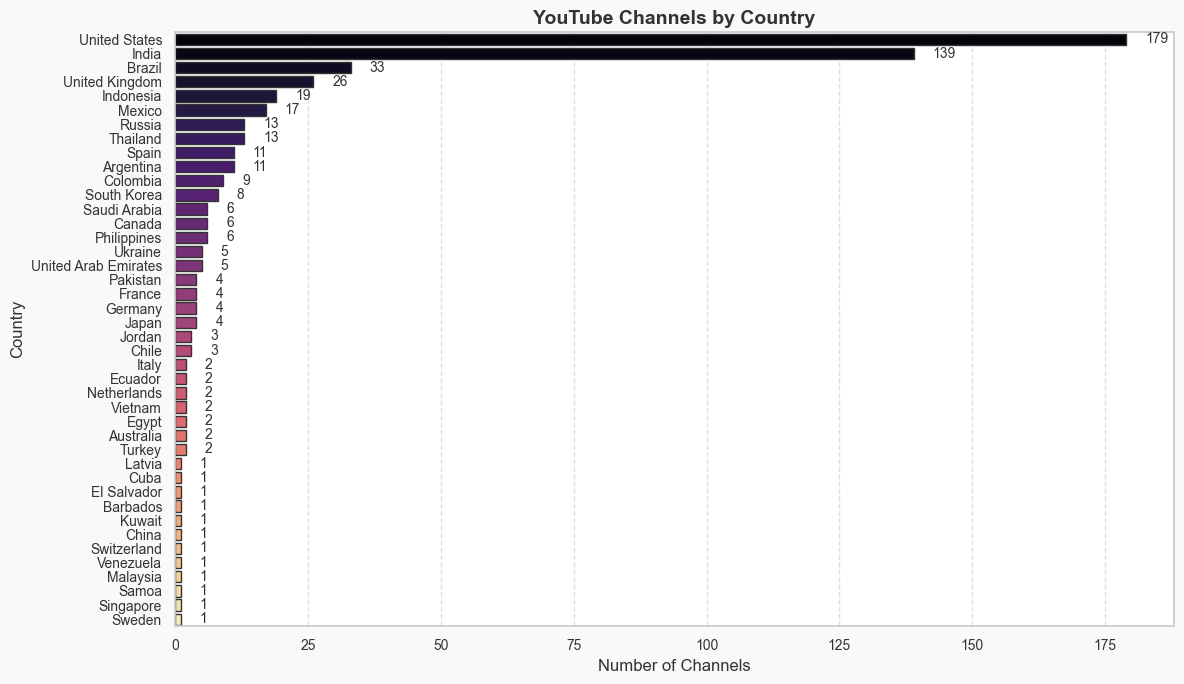

In [28]:
plt.figure(figsize=(12, 7), facecolor='#f9f9f9')
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma', edgecolor='#333333')
plt.title('YouTube Channels by Country', fontsize=14, color='#333333', fontweight='bold')
plt.xlabel('Number of Channels', fontsize=12, color='#333333')
plt.ylabel('Country', fontsize=12, color='#333333')
plt.grid(axis='x', linestyle='--', color='#d3d3d3', alpha=0.7)
ax = plt.gca()
ax.set_facecolor('#ffffff')
ax.tick_params(colors='#333333', labelsize=10)
for i, v in enumerate(country_counts.values):
    ax.text(v + 0.02 * max(country_counts.values), i, f'{int(v)}', 
            va='center', fontsize=10, color='#333333')
plt.tight_layout()
plt.show()

In [37]:
fig = plt.figure(figsize=(10, 8), facecolor='#f9f9f9')
gs = fig.add_gridspec(3, 3)
ax_main = fig.add_subplot(gs[1:3, 0:2])
sns.scatterplot(x='Gross tertiary education enrollment (%)', y='Unemployment rate', data=df, 
                hue='Gross tertiary education enrollment (%)', palette='plasma', 
                s=120, edgecolor='#333333', linewidth=0.5, alpha=0.9, ax=ax_main)
for x, y in zip(df['Gross tertiary education enrollment (%)'], df['Unemployment rate']):
    ax_main.scatter(x, y, s=200, color='white', alpha=0.2)  # Glow effect
ax_main.set_xlabel('Gross Tertiary Education Enrollment (%)', fontsize=12, color='#333333')
ax_main.set_ylabel('Unemployment Rate (%)', fontsize=12, color='#333333')
ax_main.grid(True, linestyle='--', color='#d3d3d3', alpha=0.7)
ax_main.set_facecolor('#ffffff')
ax_main.tick_params(colors='#333333', labelsize=10)

In [38]:
ax_histx = fig.add_subplot(gs[0, 0:2], sharex=ax_main)
sns.histplot(df['Gross tertiary education enrollment (%)'], color='#9467bd', alpha=0.7, ax=ax_histx)
ax_histx.set_ylabel('Count', fontsize=10, color='#333333')
ax_histx.set_facecolor('#ffffff')
ax_histx.tick_params(colors='#333333', labelsize=8, labelbottom=False)
ax_histx.grid(True, linestyle='--', color='#d3d3d3', alpha=0.7)

In [39]:
ax_histy = fig.add_subplot(gs[1:3, 2], sharey=ax_main)
sns.histplot(y=df['Unemployment rate'], color='#ff7f0e', alpha=0.7, ax=ax_histy)
ax_histy.set_xlabel('Count', fontsize=10, color='#333333')
ax_histy.set_facecolor('#ffffff')
ax_histy.tick_params(colors='#333333', labelsize=8, labelleft=False)
ax_histy.grid(True, linestyle='--', color='#d3d3d3', alpha=0.7)

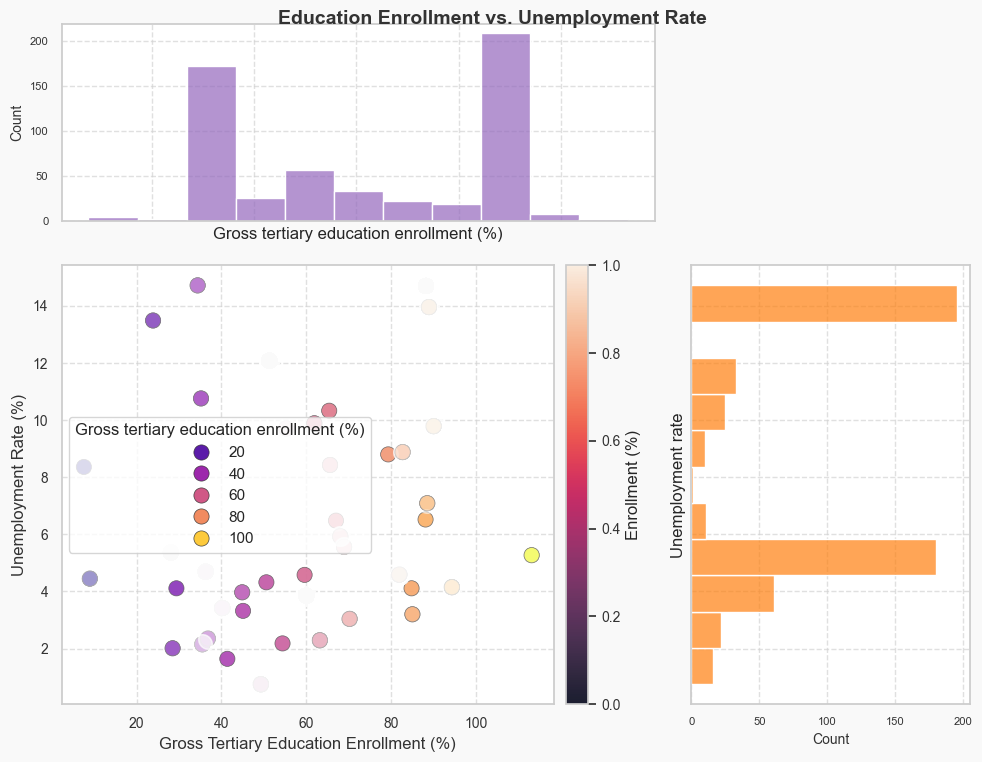

In [40]:
fig.suptitle('Education Enrollment vs. Unemployment Rate', fontsize=14, color='#333333', fontweight='bold', y=0.95)
cbar = fig.colorbar(ax_main.collections[0], ax=ax_main, label='Enrollment (%)', pad=0.02)
cbar.ax.tick_params(labelsize=10, colors='#333333')
plt.tight_layout()
plt.show()

In [53]:
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']

In [54]:
correlation_matrix = df[numerical_cols].corr()

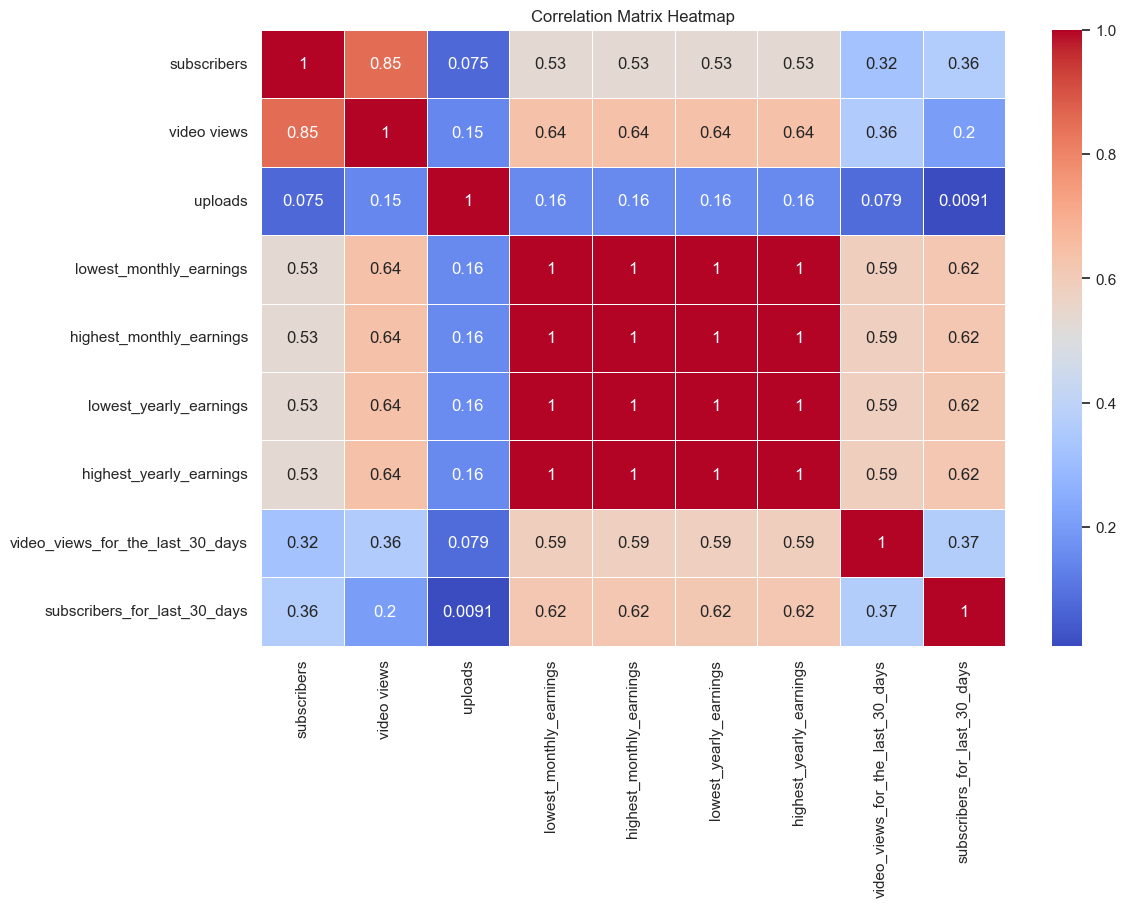

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Regression Models:

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [42]:
X = df[['video views', 'uploads']]
y = df['subscribers']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 107379845764229.67
R-squared: 0.8670140324743885


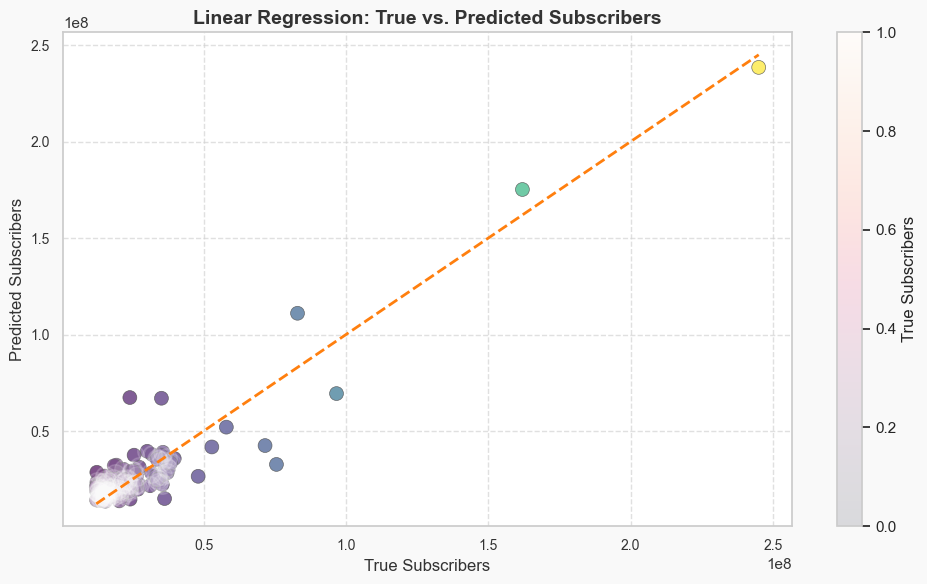

In [47]:
plt.figure(figsize=(10, 6), facecolor='#f9f9f9')
plt.scatter(y_test, y_pred, alpha=0.8, s=100, 
            c=y_test, cmap='viridis', edgecolor='#333333', linewidth=0.5)
for x, y in zip(y_test, y_pred):
    plt.scatter(x, y, s=200, color='white', alpha=0.15) 
min_val, max_val = min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='#ff7f0e', linestyle='--', linewidth=2) 
plt.title('Linear Regression: True vs. Predicted Subscribers', fontsize=14, color='#333333', fontweight='bold')
plt.xlabel('True Subscribers', fontsize=12, color='#333333')
plt.ylabel('Predicted Subscribers', fontsize=12, color='#333333')
plt.grid(True, linestyle='--', color='#d3d3d3', alpha=0.7)
ax = plt.gca()
ax.set_facecolor('#ffffff')
ax.tick_params(colors='#333333', labelsize=10)
plt.colorbar(label='True Subscribers')
plt.tight_layout()
plt.show()

## Non-Linear Regression

In [72]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [73]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [74]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [75]:
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
elasticnet_predictions = elasticnet_model.predict(X_test)

In [76]:
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)

print("Ridge Mean Squared Error:", ridge_mse)
print("Lasso Mean Squared Error:", lasso_mse)
print("ElasticNet Mean Squared Error:", elasticnet_mse)

Ridge Mean Squared Error: 107379845764229.92
Lasso Mean Squared Error: 107379845764235.2
ElasticNet Mean Squared Error: 107379845764289.69


# Decision Trees or Random Forests

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Decision Tree

In [79]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Random Forest Classifier

In [80]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [82]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

Decision Tree Accuracy: 0.009009009009009009
Random Forest Accuracy: 0.009009009009009009


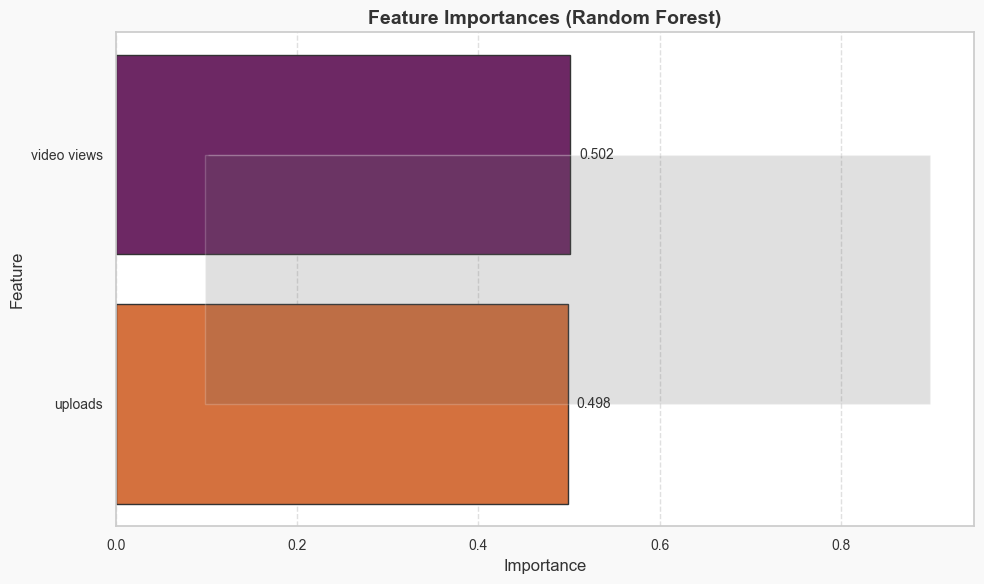

In [87]:
importances = random_forest_model.feature_importances_
features = ['video views', 'uploads'] + [f'Feature_{i+1}' for i in range(2, len(importances))]
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6), facecolor='#f9f9f9')
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='inferno', edgecolor='#333333')
for i, (index, row) in enumerate(feature_df.iterrows()):
    plt.bar(row['Importance'], i, color='#666666', alpha=0.2, zorder=1) 
plt.title('Feature Importances (Random Forest)', fontsize=14, color='#333333', fontweight='bold')
plt.xlabel('Importance', fontsize=12, color='#333333')
plt.ylabel('Feature', fontsize=12, color='#333333')
plt.grid(axis='x', linestyle='--', color='#d3d3d3', alpha=0.7)
ax = plt.gca()
ax.set_facecolor('#ffffff')
ax.tick_params(colors='#333333', labelsize=10)
for i, v in enumerate(feature_df['Importance']):
    ax.text(v + 0.02 * max(feature_df['Importance']), i, f'{v:.3f}', 
            va='center', fontsize=10, color='#333333')
plt.tight_layout()
plt.show()

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [94]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [95]:
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [96]:
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

Logistic Regression Accuracy: 0.0


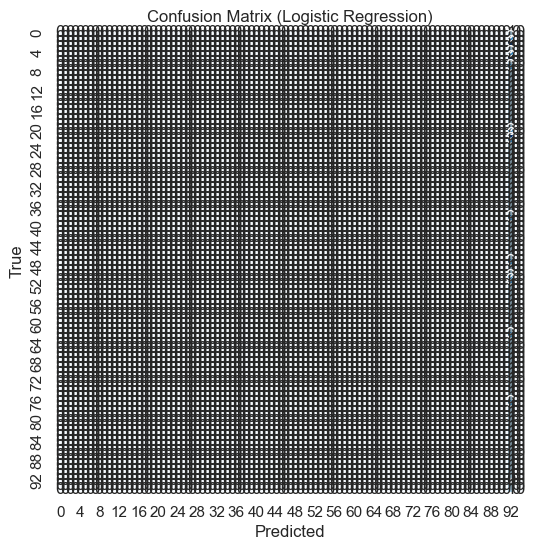

In [102]:
conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sentiment Analysis

In [101]:
pip install nltk

  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 2.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

In [4]:
df = pd.read_csv("Global_YouTube_Statistics.csv", encoding="ISO-8859-1")

In [5]:
nltk.download('stopwords')
text_data = df['Title'] 
stop_words = set(stopwords.words('english'))
cleaned_text = (
    text_data.str.lower()
    .str.replace(r'[^\w\s]', '', regex=True) 
    .str.split()
)
filtered_text = [
    [word for word in doc if word not in stop_words and len(word) > 1]
    for doc in cleaned_text
]
term_frequencies = Counter(word for sublist in filtered_text for word in sublist)
most_common_terms = term_frequencies.most_common(10)
print("Top 10 most common terms:")
for term, count in most_common_terms:
    print(f"{term}: {count}")

Top 10 most common terms:
kids: 28
tv: 21
music: 20
songs: 15
rhymes: 14
official: 14
news: 13
nursery: 12
ýýýýýýýý: 12
india: 11


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob

In [10]:
titles = df['Title']
sentiments = []
for title in titles:df['Cleaned_Title'] = df['Title'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
df['Title_Sentiment'] = df['Cleaned_Title'].apply(
    lambda title: TextBlob(title).sentiment.polarity
)
df['Sentiment_Label'] = df['Title_Sentiment'].apply(
    lambda score: 'Positive' if score > 0 else ('Neutral' if score == 0 else 'Negative')
)
print(df[['Title', 'Title_Sentiment', 'Sentiment_Label']].head())

                        Title  Title_Sentiment Sentiment_Label
0                    T-Series              0.0         Neutral
1               youtubemovies              0.0         Neutral
2                     MrBeast              0.0         Neutral
3  Cocomelon - Nursery Rhymes              0.0         Neutral
4                   SET India              0.0         Neutral
